In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/python_IRN/Python_for_Deep_Learning/*.py

'/content/drive/My Drive/python_IRN/Python_for_Deep_Learning/my_module.py'
'/content/drive/My Drive/python_IRN/Python_for_Deep_Learning/perceptron.py'


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/python_IRN/Python_for_Deep_Learning')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Perceptron
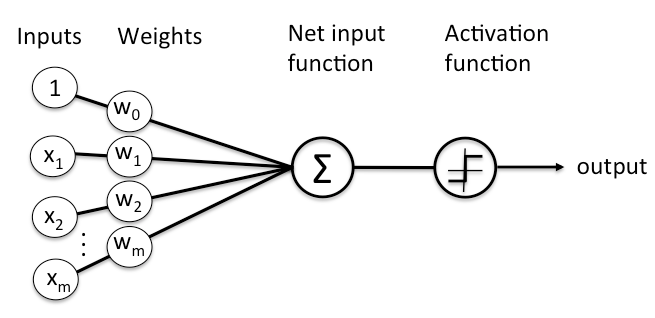

## Perceptron Learning Rule
### Rosenblatt's perceptron scheme
1. Initialize the weights to 0 or small random numbers.
2. For each training sample **$x^{(i)}$**:
> * Calculate the output value. $\mathbf{w}^T\mathbf{x}^{(i)} = \sum_{j=0}^mw_jx^{(i)}_j$
> * Update the weights. $\Delta w_j = \eta(target^{(i)}-output^{(i)})x_j^{(i)}$

In [1]:
# perceptron.py

class Perceptron(object):
  def __init__(self, lr=0.01, epochs=50):
    self.lr = lr
    self.epochs = epochs

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.epochs):
      errors = 0
      for xi, target in zip(X, y):
        update = self.lr * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

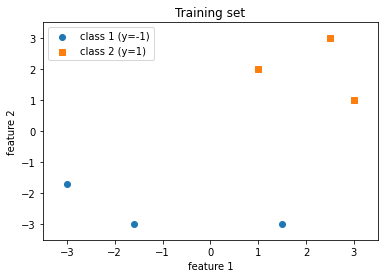

In [4]:
# simple problem setting
X = [[1,2], [2.5,3], [3,1], [-3,-1.7], [-1.6,-3], [1.5,-3]]
y = [1, 1, 1, -1, -1, -1]

X = np.array(X)
y = np.array(y)

import matplotlib.pyplot as plt
plt.scatter(X[y==-1,0], X[y==-1,1], label='class 1 (y=-1)', marker='o')
plt.scatter(X[y==1,0], X[y==1,1], label='class 2 (y=1)', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5,3.5])
plt.legend()
plt.show()

weight =  [-0.2   0.6   0.34]


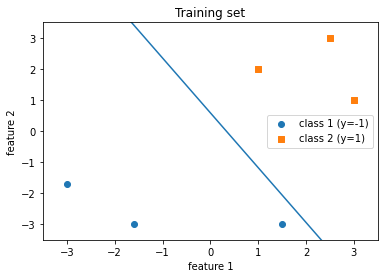

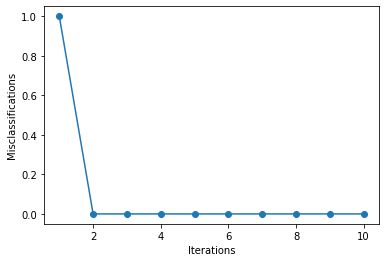

In [5]:
ppn = Perceptron(epochs=10, lr=0.1)

ppn.fit(X,y)
print('weight = ', ppn.w_)

x_min = -3.5
y_min = ((-ppn.w_[1]*x_min) - ppn.w_[0])/ppn.w_[2]
x_max = 3.5
y_max = ((-ppn.w_[1]*x_max) - ppn.w_[0])/ppn.w_[2]
plt.plot([x_min, x_max], [y_min, y_max])
plt.scatter(X[y==-1,0], X[y==-1,1], label='class 1 (y=-1)', marker='o')
plt.scatter(X[y==1,0], X[y==1,1], label='class 2 (y=1)', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5,3.5])
plt.legend()
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

## Perceptron for Iris dataset

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# pre-analytic
# df[4]
df.groupby(df[4]).size()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

Weight:  [-0.4  -0.68  1.82]


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


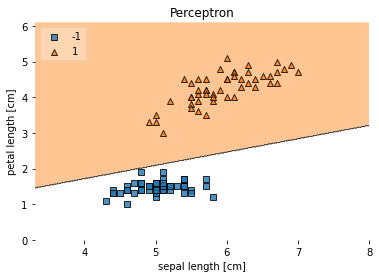

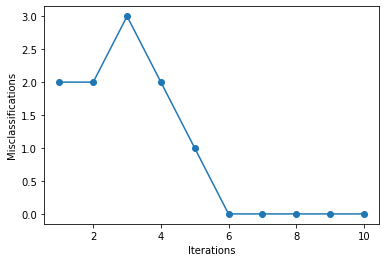

In [ ]:
%matplotlib inline

ppn = Perceptron(epochs=10, lr=0.1)

ppn.fit(X,y)
print('Weight: ', ppn.w_)
plot_decision_regions(X, y, clf=ppn, legend=2)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


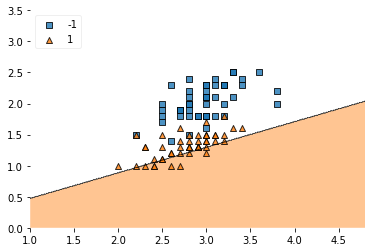

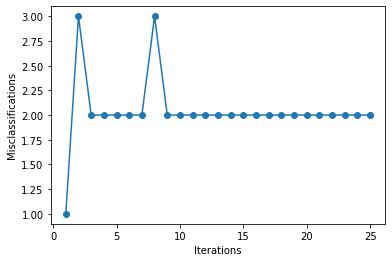

In [ ]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, lr=0.01)
ppn.fit(X2, y2)

plot_decision_regions(X2, y2, clf=ppn, legend=2)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [ ]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 43 of 100


## Conclusion
The ( classical ) perceptron has many problems:
* Linear classifier, no non-linear boundaries possible.
* Binary classifier, can not solve XOR problems, for example.
* Does not converge if classes are not linearly separable.
* Many “optimal” solutions in terms of 0/1 loss on the training data, most will not be optimal in terms of generalization performance.

# ADAptive LInear NEuron : ADALINE

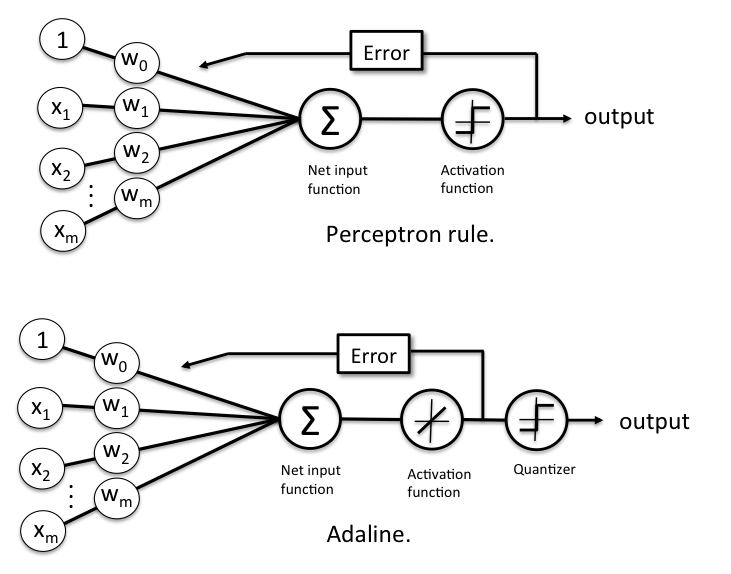

## What Adaline and the Perceptron have in common
* they are classifiers for binary classification
* both have a linear decision boundary
* both can learn iteratively, sample by sample (the Perceptron naturally, and Adaline via stochastic gradient descent)
* both use a threshold function

## The differences between the Perceptron and Adaline
* the Perceptron uses the class labels to learn model coefficients
* Adaline uses continuous predicted values (from the net input) to learn the model coefficients, which is more “powerful” since it tells us by “how much” we were right or wrong

## Adaline-GD

* **Cost function (Sum Squared Error : SSE)** : $$\mathcal{L}(\mathbf{w}, b) := \frac{1}{2}\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2,$$ where $\hat{y}^{(i)}=\sigma(\mathbf{w}^T\mathbf{x}^{(i)})$, $\sigma$ is an activation function (in this case, $\sigma$ is identity)
> $\Longrightarrow$ In maths! $\mathcal{L}(\mathbf{w}, b) := \frac{1}{2}||y^{(i)}-\hat{y}^{(i)}||^2$

* **Target (Least square problem : LS)** : $$\min_{\mathbf{w}, b}\mathcal{L}(\mathbf{w}, b) \tag{LS}$$
> $\Longrightarrow$ In statistics!, the problem (LS) can be sloved by $$\mathbf{w} = (X^TX)^{-1}X^Ty, $$ where $X = \begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_m\\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_m\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_m
\end{bmatrix}$ and $y = \begin{bmatrix}
1\\
y^{(1)}\\
\vdots\\
y^{(n)}
\end{bmatrix}$  
$\Longrightarrow$ This is the best approach for linear regression but not popular in DL. Why?

* **Learning rule (Gradient descent : GD)**: Lucky! activation function is convex, so GD can work!

In [ ]:
# Set training data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

In [ ]:
# adalinegd.py

class AdalineGD(object):

    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.epochs):
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

[ 1.69897     3.34847114  6.5410769   9.73426945 12.92746232 16.12065519
 19.31384806 22.50704094 25.70023381 28.89342668]


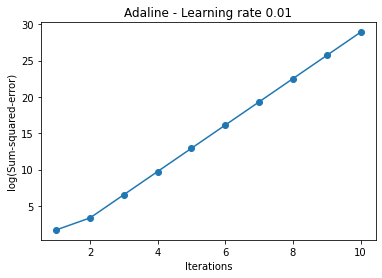

[50.0, 48.06916268602549, 46.75624785073664, 45.67588152905384, 44.6913293479668, 43.75388836192351, 42.84602748758452, 41.961257613784404, 41.09700496411307, 40.252087948337085]


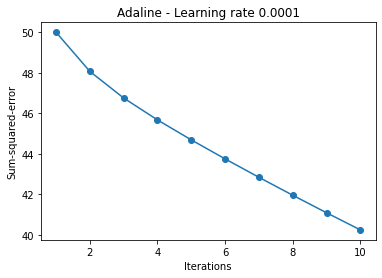

In [ ]:
ada = AdalineGD(epochs=10, lr=0.01).train(X, y)
print(np.log10(ada.cost_))
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, lr=0.0001).train(X, y)
print(ada.cost_)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


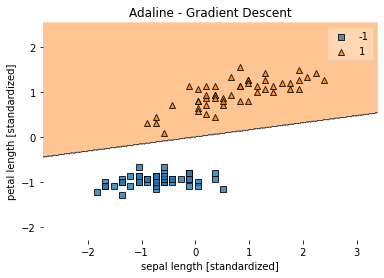

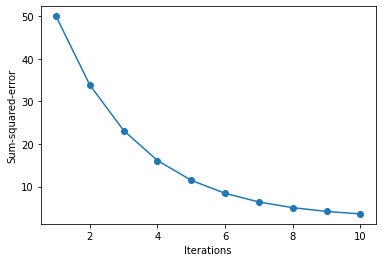

In [ ]:
%matplotlib inline

ada = AdalineGD(epochs=10, lr=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

## Adaline-SGD

In [ ]:
# adalinesgd.py

class AdalineSGD(object):

    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):

            # shuffle data
            idx = np.random.permutation(len(y))
            X_shuffled, y_shuffled =  X[idx], y[idx]

            for xi, target in zip(X_shuffled, y_shuffled):
                output = self.activation(xi)
                error = (target - output)
                self.w_[1:] += self.lr * xi.dot(error)
                self.w_[0] += self.lr * error

            cost = ((y_shuffled - self.activation(X_shuffled))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    def score(self, X, y):
      return sum(self.predict(X)==y)/len(y)

weight :  [ 0.00259677 -0.1378775   1.07693768] accuracy =  1.0


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


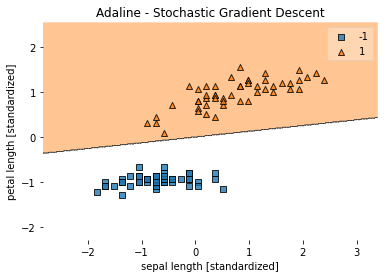

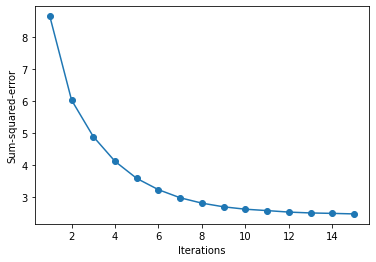

In [ ]:
ada = AdalineSGD(epochs=15, lr=0.01)

# train and adaline and plot decision regions
ada.train(X_std, y)
print('weight : ', ada.w_, 'accuracy = ', ada.score(X_std,y))
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

# Linear Regression

## Adaline & Linear regression

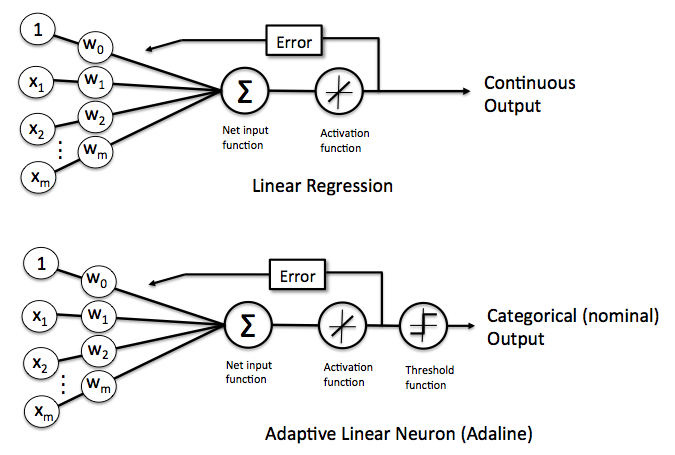

## Problem setting

* Estimate the equation : $y = x^2 + x - 6$
* Above problem called "**Polynomial regression**" with the degree 2
* Slove the polynomial problem as a linear problem, $$y = x_2 + x_1 - 6; x_2 = x^2, x_1 = x$$

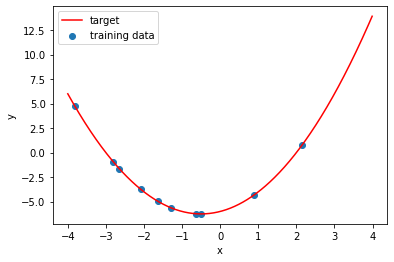

In [ ]:
np.random.seed(111)
X = np.random.uniform(-4.0, 4.0, 10)
y = X*X + X - 6
target = np.arange(-4.0, 4.0, 0.01)
plt.plot(target, target*target + target - 6, '-r', label = 'target')
plt.scatter(X, y, label='training data', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Generate the training dataset\
X1, X2 = X, X*X
X_train = np.concatenate((X1.reshape((-1,1)), X2.reshape((-1,1))), axis=1)
y_train = y

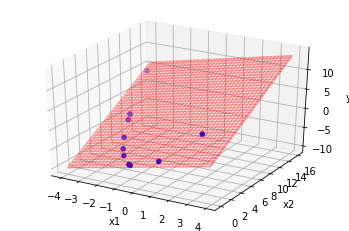

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(np.arange(-4.0, 4.0, 0.1), np.arange(0.0, 16.0, 0.1))
zz = xx + yy - 6

ax.scatter(X_train[:,0], X_train[:,1], y_train, c='b', marker='o')
ax.plot_wireframe(xx, yy, zz, alpha=0.3, color='r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [ ]:
class LinearRegression(AdalineSGD):
  def __init__(self, eta=0.01, epochs=50):
    super().__init__(eta, epochs)
  def predict(self,X):
    return self.activation(X)
  def score(self, X, y):
    return sum(self.predict(X)-y)**2/len(y)

weight :  [-5.5855261   1.02919383  0.93596765] MSE =  0.08911822240184981


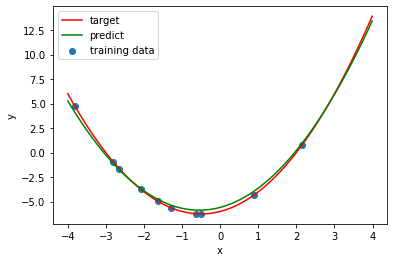

In [ ]:
linreg = LinearRegression(eta=0.01, epochs=50)
linreg.train(X_train, y_train)
print('weight : ', linreg.w_, 'MSE = ', linreg.score(X_train, y_train))

xx = np.arange(-4.0, 4.0, 0.01)
yy = linreg.predict(np.concatenate((xx.reshape((-1,1)), (xx*xx).reshape((-1,1))), axis=1))
plt.plot(xx, xx*xx + xx - 6, '-r', label='target')
plt.plot(xx,yy, '-g', label='predict')
plt.scatter(X, y, label='training data', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Slove with statsmodels

In [ ]:
import statsmodels.api as sm
Xsm_train, ysm = sm.add_constant(X_train), y_train
model = sm.OLS(ysm, Xsm_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.625e+31
Date:                Fri, 04 Sep 2020   Prob (F-statistic):          4.64e-108
Time:                        18:01:20   Log-Likelihood:                 326.69
No. Observations:                  10   AIC:                            -647.4
Df Residuals:                       7   BIC:                            -646.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0000    8.6e-16  -6.98e+15      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
y_predicted = results.predict(Xsm_train)
print('weight : ', results.params, 'MSE = ', sum(y_predicted-y)**2/len(y))

weight :  [-6.  1.  1.] MSE =  4.930380657631324e-31


# Neurons with non-linear activation functions

* Training dataset : $\mathcal{D} = \{(x^{(i)}, y^{(i)})\in\mathbb{R}^{m\times 1}\times\mathbb{R} : i \in \{1, 2, \ldots, n\}\}$
* Input : $\mathbf{x}^{(i)} = [1, x^{(i)}_1, x^{(i)}_2, \ldots, x^{(i)}_m]^T$
* Output : $\hat{y}^{(i)} = \sigma(z^{(i)})$ where $z^{(i)} = \mathbf{w}^Tx^{(i)}$, $\mathbf{w}=[b, w_1, w_2, \ldots, w_m]^T$
* Cost : $\mathcal{L}(\mathbf{w}) = \frac{1}{2}||y-\hat{y}||^2$
* Parameter update : $$\mathbf{w} = \mathbf{w} + \eta\nabla_{\mathbf{w}}\mathcal{L}$$ where $\nabla_{\mathbf{w}}\mathcal{L}=\left[\frac{\partial\mathcal{L}}{\partial{w_0}}, \frac{\partial\mathcal{L}}{\partial{w_1}}, \frac{\partial\mathcal{L}}{\partial{w_2}}, \ldots, \frac{\partial\mathcal{L}}{\partial{w_m}}\right]^T$, $\frac{\partial\mathcal{L}}{\partial{w_j}} = -(y^{(i)}-\hat{y}^{(i)})\sigma'(z^{(i)})x^{(i)}_j$

> Linear regression update : $$\mathbf{w} = \mathbf{w} + \eta\nabla_{\mathbf{w}}\mathcal{L}$$ where $\nabla_{\mathbf{w}}\mathcal{L}=\left[\frac{\partial\mathcal{L}}{\partial{w_0}}, \frac{\partial\mathcal{L}}{\partial{w_1}}, \frac{\partial\mathcal{L}}{\partial{w_2}}, \ldots, \frac{\partial\mathcal{L}}{\partial{w_m}}\right]^T$, $\frac{\partial\mathcal{L}}{\partial{w_j}} = -(y^{(i)}-\hat{y}^{(i)})x^{(i)}_j$

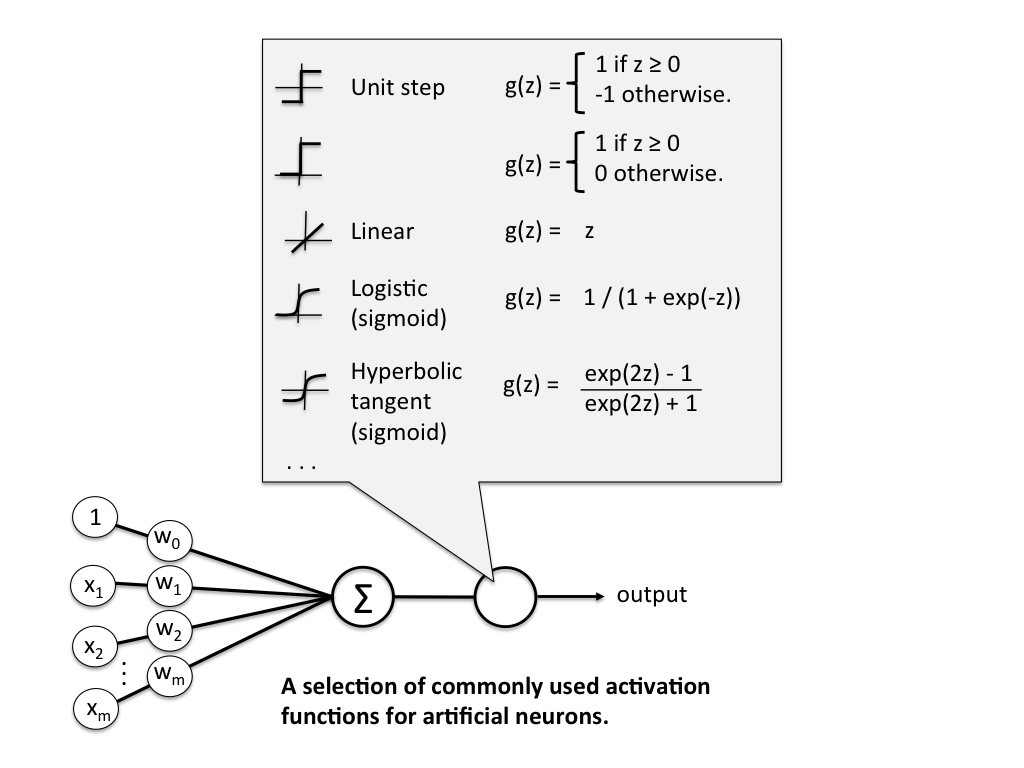

In [ ]:
# Assignment

# PyTorch

* website : [https://pytorch.org/](https://pytorch.org/)
* Installation tips : [https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/other/pytorch-installation-tips.md](https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/other/pytorch-installation-tips.md)
* book : [https://pytorch.org/deep-learning-with-pytorch](https://pytorch.org/deep-learning-with-pytorch)

## What is PyTorch?

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

In [ ]:
!pip list -v | grep [Tt]orch

torch                         1.6.0+cu101     /usr/local/lib/python3.6/dist-packages pip      
torchsummary                  1.5.1           /usr/local/lib/python3.6/dist-packages pip      
torchtext                     0.3.1           /usr/local/lib/python3.6/dist-packages pip      
torchvision                   0.7.0+cu101     /usr/local/lib/python3.6/dist-packages pip      


In [1]:
import torch
torch.__version__

'1.6.0'

## torch.tensor

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type. Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

* Scalar (rank-0 tensor) : $x\in\mathbb{R}$, e.g. $x=1$
* Vector (rank-1 tensor) : $\mathbf{x}\in\mathbb{R}^{m} [:=\mathbb{R}^{m\times 1}]$, e.g. $$\mathbf{x}=\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_m
\end{bmatrix}$$
* Matrix (rank-2 tensor) : $X\in\mathbb{R}^{n\times m}$, e.g. $$X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_m\\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_m\\
\vdots & \vdots & \ddots & \vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_m
\end{bmatrix}$$
* 3D-tensor (rank-3 tensor) : $X\in\mathbb{R}^{n\times m\times p}$, e.g. RGB image $X\in\mathbb{R}^{n\times m\times 3}$
> 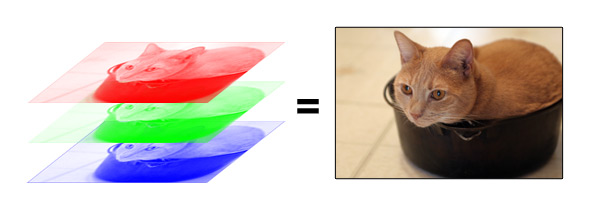
* 4D-tensor (rank-4 tensor) : Bath of images, e.g. CIFAR10-dataset
> 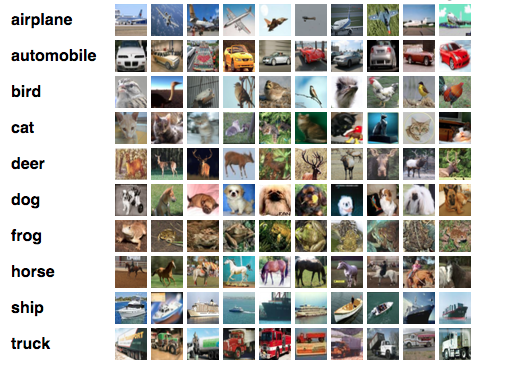


In [8]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 4.6566e-10, 0.0000e+00],
        [4.6566e-10, 1.1210e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [9]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1186, 0.5330, 0.7409],
        [0.7922, 0.2183, 0.1011],
        [0.8934, 0.3019, 0.2663],
        [0.0578, 0.4413, 0.6430],
        [0.4215, 0.5131, 0.7362]])


In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.6146, -2.2617,  0.1821],
        [ 1.4448,  0.5561, -0.3455],
        [-1.3866, -1.1146,  1.0439],
        [-0.0878, -0.5948,  0.1853],
        [ 0.5942, -0.5480, -1.4018]])


In [ ]:
print(x.size())

torch.Size([5, 3])


### NumPy Bridge : ``torch.tensor`` vs ``np.array``

In [4]:
a = np.array([1.,2.,3.])
b = torch.tensor([1.,2.,3.])
print('a : \t type = ', a.dtype, '\t\t shape = ', a.shape)
print('b : \t type = ', b.dtype, '\t\t shape = ', b.shape)

NameError: name 'np' is not defined

In [ ]:
print(a.dot(a), b.matmul(b))

14.0 tensor(14.)


In [ ]:
b.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
torch.tensor(a)

tensor([1., 2., 3.], dtype=torch.float64)

### ``tensor.dtype``

In [ ]:
c = torch.tensor([1.,2.,3.])
d = torch.tensor([1,2,3])
print(c.dtype, d.dtype)

torch.float32 torch.int64


In [ ]:
print(c+d, (c+d).dtype)
print(c*d, (c*d).dtype)
print(c-d, (c-d).dtype)
print(d-c, (d-c).dtype)

tensor([2., 4., 6.]) torch.float32
tensor([1., 4., 9.]) torch.float32
tensor([0., 0., 0.]) torch.float32
tensor([0., 0., 0.]) torch.float32


In [ ]:
print(c.float()-d.float(), (c.float()-d.float()).dtype)
print(c.double()-d.double(), (c.double()-d.double()).dtype)
print(c.int()-d.int(), (c.int()-d.int()).dtype)
print(c.long()-d.long(), (c.long()-d.long()).dtype)

tensor([0., 0., 0.]) torch.float32
tensor([0., 0., 0.], dtype=torch.float64) torch.float64
tensor([0, 0, 0], dtype=torch.int32) torch.int32
tensor([0, 0, 0]) torch.int64


In [ ]:
c.matmul(d)

In [ ]:
c.matmul(d.float())

tensor(14.)

### Loading data onto GPU

In [2]:
print(torch.cuda.is_available())

False


In [ ]:
print(torch.cuda.current_stream())

In [ ]:
b = b.to(torch.device('cuda:0'))
print(b)

In [3]:
b = b.to(torch.device('cpu'))
print(b)

NameError: name 'b' is not defined

In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

### tensor with math operator

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

In [ ]:
a + b

tensor([5, 7, 9])

In [ ]:
a - b

tensor([-3, -3, -3])

In [ ]:
a * b

tensor([ 4, 10, 18])

In [ ]:
a + 1

tensor([2, 3, 4])

In [ ]:
a * 3

tensor([3, 6, 9])

In [ ]:
torch.add(a,b) # a+b

tensor([5, 7, 9])

In [ ]:
a.add_(b)

tensor([5, 7, 9])

In [ ]:
X, w = torch.arange(6).view(2, 3), torch.tensor([1, 2, 3])
print(X, w)

tensor([[0, 1, 2],
        [3, 4, 5]]) tensor([1, 2, 3])


In [ ]:
X.matmul(w)

tensor([ 8, 26])

In [ ]:
# not broardcast
torch.mm(X,w.view(-1,1)) # .view(-1,1) as reshape in numpy

tensor([[ 8],
        [26]])

In [ ]:
# broardcast
X.matmul(w.view(-1,1))

tensor([[ 8],
        [26]])

### Broadcasting

In [ ]:
torch.tensor([1, 2, 3]) + 1

tensor([2, 3, 4])

In [ ]:
t = torch.tensor([[4, 5, 6], [7, 8, 9]])
t

tensor([[4, 5, 6],
        [7, 8, 9]])

In [ ]:
t + torch.tensor([1, 2, 3])

tensor([[ 5,  7,  9],
        [ 8, 10, 12]])

In [ ]:
# matmul does broadcast, mm does not.
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print('tensor1 : ', tensor1, tensor1.size())
print('\ntensor2 : ', tensor2, tensor2.size())
print('\nmatmul : ', torch.matmul(tensor1, tensor2), torch.matmul(tensor1, tensor2).size())
print('\nmm : ',torch.mm(tensor1, tensor2.view(4,1)), torch.mm(tensor1, tensor2.view(4,1)).size())

tensor1 :  tensor([[-1.7950, -0.1854,  0.7127, -0.1258],
        [ 2.2545,  1.0654,  1.1381,  0.6366],
        [ 0.7304,  0.9995,  0.7113, -0.6791]]) torch.Size([3, 4])

tensor2 :  tensor([ 0.1480,  0.4950, -1.2867, -0.9331]) torch.Size([4])

matmul :  tensor([-1.1571, -1.1975,  0.3213]) torch.Size([3])

mm :  tensor([[-1.1571],
        [-1.1975],
        [ 0.3213]]) torch.Size([3, 1])


In [ ]:
# vector x vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
print('vector x vector: \t\t\t\t', torch.matmul(tensor1, tensor2).size())

# matrix x vector
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print('matrix x vector: \t\t\t\t', torch.matmul(tensor1, tensor2).size())

# batched matrix x broadcasted vector
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)
print('batched matrix x broadcasted vector: \t\t', torch.matmul(tensor1, tensor2).size())

# batched matrix x batched matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
print('batched matrix x batched matrix: \t\t', torch.matmul(tensor1, tensor2).size())

# batched matrix x broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)
print('batched matrix x broadcasted matrix: \t\t', torch.matmul(tensor1, tensor2).size())

vector x vector: 				 torch.Size([])
matrix x vector: 				 torch.Size([3])
batched matrix x broadcasted vector: 		 torch.Size([10, 3])
batched matrix x batched matrix: 		 torch.Size([10, 3, 5])
batched matrix x broadcasted matrix: 		 torch.Size([10, 3, 5])


## torch.nn
Neural networks can be constructed using the ``torch.nn`` package.

### Some linear algebra in PyTorch

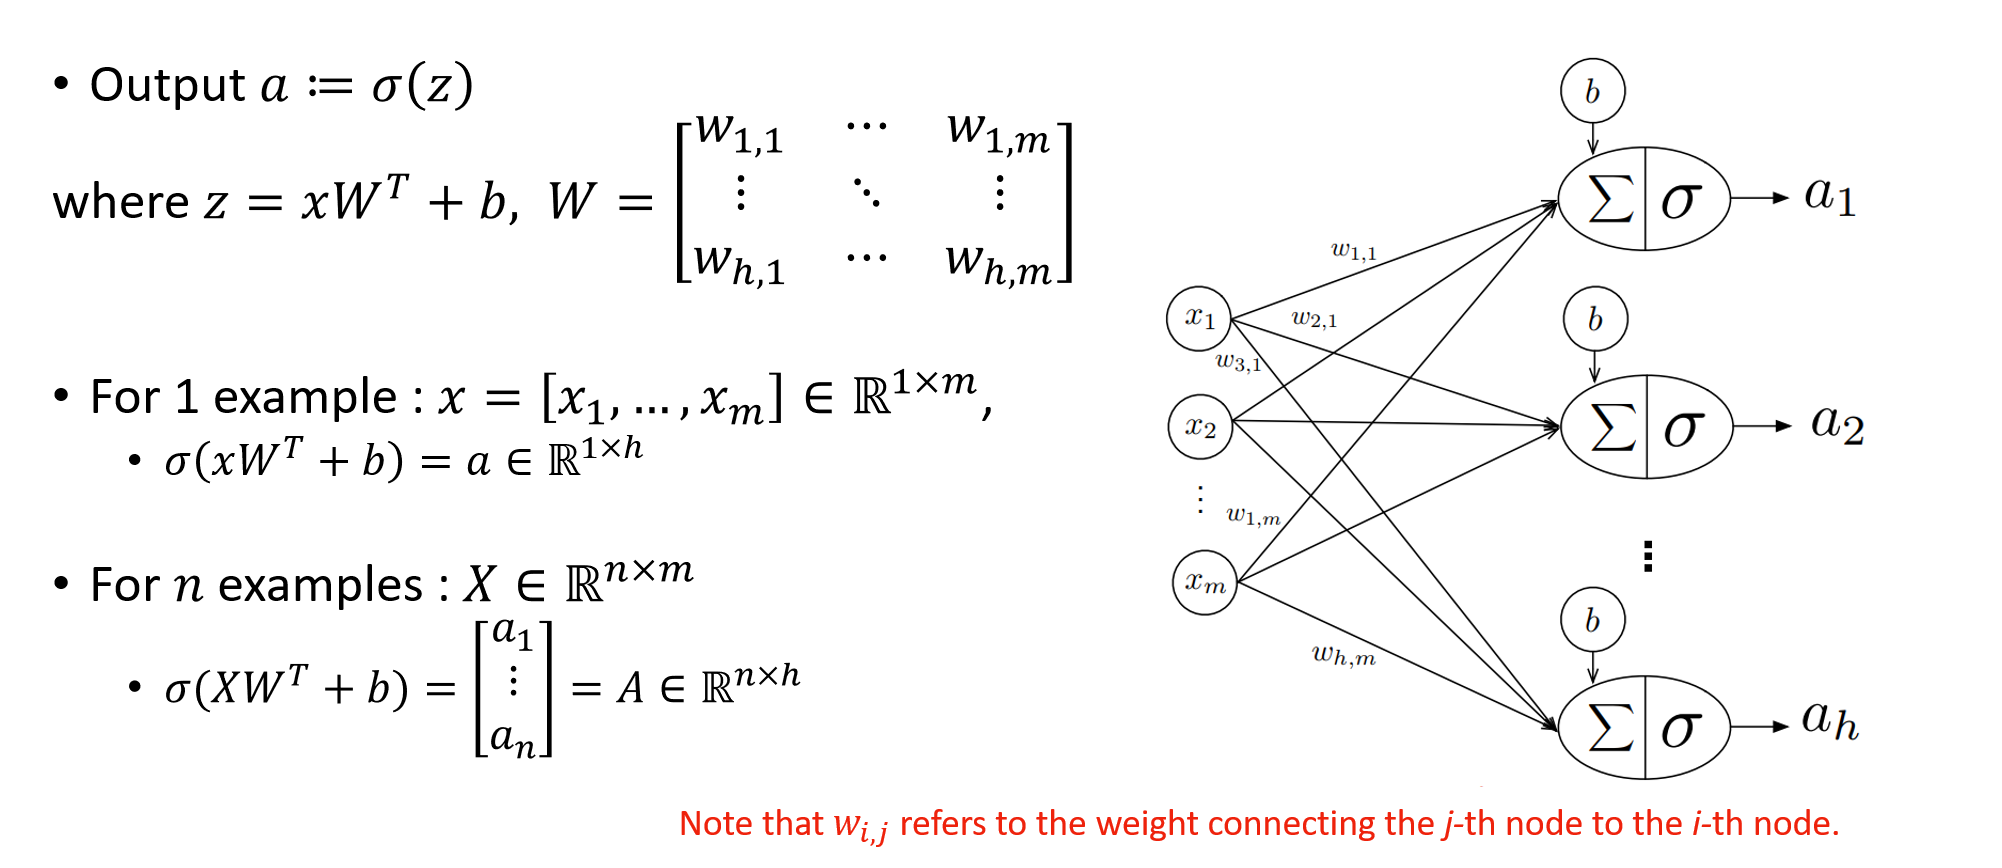

### [Example] Construct simple (linear) NNs

In [ ]:
X = torch.arange(50, dtype=torch.float).view(10,5)
X

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])

In [ ]:
lin_layer = torch.nn.Linear(in_features=5, out_features=3)

In [ ]:
lin_layer.weight

Parameter containing:
tensor([[ 0.4208,  0.0126, -0.3558, -0.2300, -0.3899],
        [ 0.4186, -0.0297,  0.1785, -0.1142,  0.1725],
        [-0.1956, -0.3959, -0.2556,  0.3975, -0.0763]], requires_grad=True)

In [ ]:
lin_layer.bias

Parameter containing:
tensor([-0.0425, -0.3632, -0.1863], requires_grad=True)

In [ ]:
lin_layer.weight.T.size()

torch.Size([5, 3])

In [ ]:
print('dim(X):', X.size())
print('dim(W):', lin_layer.weight.size())
print('dim(b):', lin_layer.bias.size())
A = lin_layer(X)
print('A:', A)
print('dim(A):', A.size())

print('XW^T+b:', X.matmul(lin_layer.weight.T)+lin_layer.bias)
print('dim(XW^T+b):', (X.matmul(lin_layer.weight.T)+lin_layer.bias).size())

dim(X): torch.Size([10, 5])
dim(W): torch.Size([3, 5])
dim(b): torch.Size([3])
A: tensor([[ -2.9911,   0.3116,  -0.2063],
        [ -5.7024,   3.4401,  -2.8361],
        [ -8.4137,   6.5686,  -5.4658],
        [-11.1251,   9.6971,  -8.0956],
        [-13.8364,  12.8256, -10.7253],
        [-16.5477,  15.9541, -13.3551],
        [-19.2590,  19.0826, -15.9849],
        [-21.9703,  22.2111, -18.6146],
        [-24.6816,  25.3395, -21.2444],
        [-27.3930,  28.4680, -23.8741]], grad_fn=<AddmmBackward>)
dim(A): torch.Size([10, 3])
XW^T+b: tensor([[ -2.9911,   0.3116,  -0.2063],
        [ -5.7024,   3.4401,  -2.8361],
        [ -8.4137,   6.5686,  -5.4658],
        [-11.1251,   9.6971,  -8.0956],
        [-13.8364,  12.8256, -10.7253],
        [-16.5477,  15.9541, -13.3551],
        [-19.2590,  19.0826, -15.9849],
        [-21.9703,  22.2111, -18.6146],
        [-24.6816,  25.3395, -21.2444],
        [-27.3930,  28.4680, -23.8741]], grad_fn=<AddBackward0>)
dim(XW^T+b): torch.Size([10, 3]

## torch.autograd

> AUTOGRAD = Automatic Differentiation

### ``.grad``

In [6]:
from torch.autograd import grad
import torch.nn.functional as F

In [8]:
# f(x) = x, x = 3
x = torch.tensor([3.], requires_grad=True)

# f'(x) = 1, f'(3) = ?
g = grad(x,x, retain_graph=False)
print('f\'(3) = ', g[0].numpy().item())

f'(3) =  1.0


In [11]:
x = torch.tensor([3.], requires_grad=True)

# f(x) = x * x
y = x*x
print(grad(y,x, retain_graph=False))

(tensor([6.]),)


Computation Graph Recap

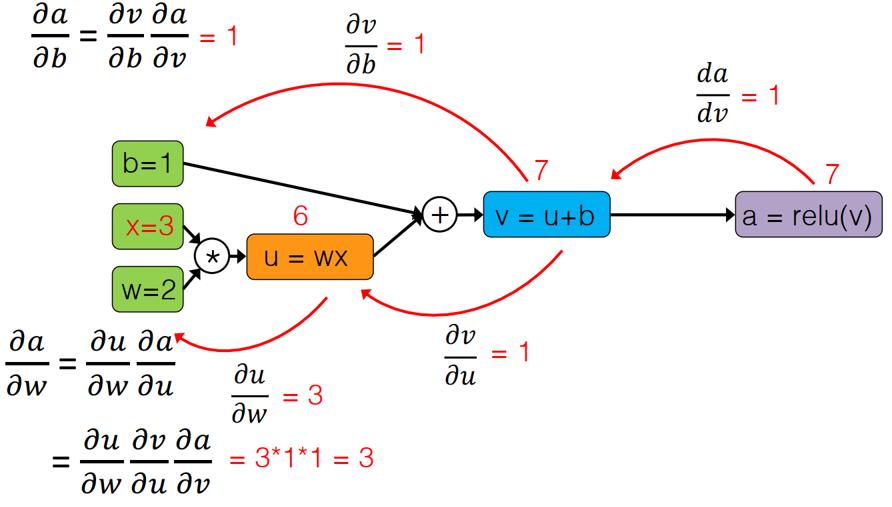

In [ ]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)
a

tensor([7.], grad_fn=<ReluBackward0>)

In [ ]:
print(a.grad_fn)

In [ ]:
grad(a, w, retain_graph=True) # Keep graph in memory

(tensor([3.]),)

In [ ]:
grad(a, b)

(tensor([1.]),)

In [13]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = my_relu(x*w + b)
grad(a, w)

(tensor([6.]),)

In [ ]:
x = torch.tensor([-1.])
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = F.relu(x*w + b)
grad(a, w, retain_graph=False)

(tensor([-0.]),)

### ``.requires_grad`` and ``.retain_graph``

In [ ]:
?torch.is_grad_enabled

In [ ]:
# from above example

x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)

grad(a, w, retain_graph=True)
grad(a, b, retain_graph=True)
grad(a, x)

RuntimeError: ignored

In [ ]:
from torch.autograd import grad
import torch.nn.functional as F

In [ ]:
x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

d_a_b = grad(a, b, retain_graph=True)
d_a_u = grad(a, u, retain_graph=True)
d_a_v = grad(a, v, retain_graph=True)
d_a_w = grad(a, w, retain_graph=True)
d_a_x = grad(a, x)

for name, _ in zip("xwbuv", (d_a_x, d_a_w, d_a_b, d_a_u, d_a_v)):
    print('d_a_%s:' %name, _)

d_a_x: (tensor([2.]),)
d_a_w: (tensor([3.]),)
d_a_b: (tensor([1.]),)
d_a_u: (tensor([1.]),)
d_a_v: (tensor([1.]),)


In [ ]:
x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

partial_derivatives = grad(a, (x, w, b, u, v))

for name, _ in zip("xwbuv", (partial_derivatives)):
    print('d_a_%s:' %name, _)

d_a_x: tensor([2.])
d_a_w: tensor([3.])
d_a_b: tensor([1.])
d_a_u: tensor([1.])
d_a_v: tensor([1.])


### ``.detach`` and ``.zero_``

In [ ]:
torch.manual_seed(111)
x = torch.randn(3,3,requires_grad=True)
x

tensor([[-0.1222, -0.7573,  1.0416],
        [ 0.3303,  0.5315, -1.0235],
        [ 1.3560,  0.3086,  0.5228]], requires_grad=True)

In [ ]:
y = x.detach()
y

tensor([[-0.1222, -0.7573,  1.0416],
        [ 0.3303,  0.5315, -1.0235],
        [ 1.3560,  0.3086,  0.5228]])

In [ ]:
y.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

### ``.backward`` and ``retain_grad``

Note that ``retain_grad=False`` in default

In [51]:
# Ex .backward()

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
# print(x.is_leaf, w.is_leaf, b.is_leaf)

u = x * w
v = u + b
a = F.relu(v)

# u.retain_grad()
# v.retain_grad()

a.backward()

for name, var in zip("xwbuv", (x, w, b, u, v)):
    print('d_a_%s:' % name, var.grad)

d_a_x: tensor([2.])
d_a_w: tensor([3.])
d_a_b: tensor([1.])
d_a_u: None
d_a_v: None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.


In [ ]:
# Ex from autograd_tutorial

x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [ ]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.
Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.



Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$,
then the gradient of $\vec{y}$ with respect to $\vec{x}$
is a Jacobian matrix:

\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align}

Generally speaking, ``torch.autograd`` is an engine for computing
vector-Jacobian product. That is, given any vector
$v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$,
compute the product $v^{T}\cdot J$. If $v$ happens to be
the gradient of a scalar function $l=g\left(\vec{y}\right)$,
that is,
$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$,
then by the chain rule, the vector-Jacobian product would be the
gradient of $l$ with respect to $\vec{x}$:

\begin{align}J^{T}\cdot v=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\left(\begin{array}{c}
   \frac{\partial l}{\partial y_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial y_{m}}
   \end{array}\right)=\left(\begin{array}{c}
   \frac{\partial l}{\partial x_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial x_{n}}
   \end{array}\right)\end{align}

(Note that $v^{T}\cdot J$ gives a row vector which can be
treated as a column vector by taking $J^{T}\cdot v$.)

This characteristic of vector-Jacobian product makes it very
convenient to feed external gradients into a model that has
non-scalar output.



Now let's take a look at an example of vector-Jacobian product:

In [ ]:
torch.manual_seed(111)
x = torch.randn(3, requires_grad=True)
print('x = ', x)
y = x * 2
print('y = ', y)
while y.data.norm() < 1000:
    y = y * 2

print('y = ', y, '||y|| = ', y.data.norm())

x =  tensor([-0.1222, -0.7573,  1.0416], requires_grad=True)
y =  tensor([-0.2445, -1.5145,  2.0832], grad_fn=<MulBackward0>)
y =  tensor([-125.1765, -775.4245, 1066.5996], grad_fn=<MulBackward0>) ||y|| =  tensor(1324.6083)


In [ ]:
y.backward() # error!

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


Above expression shows that $\nabla_{x}y$ can be calculated by passing the vector $v$, why?

Let's see the following snipped code.

In [ ]:
x = torch.tensor([[2.,1.]], requires_grad=True)
print('x = ', x, x.size())

M = torch.tensor([[1.,2.],[3.,4.]])
print('M = ', M, M.size())

y = torch.mm(x, M)
print('y = ', y)

y.backward(torch.tensor([[1,0]]), retain_graph = True)
print(x.grad)

x.grad.zero_()
y.backward(torch.tensor([[0,1]]), retain_graph = True)
print(x.grad)

x.grad.zero_()
y.backward(torch.tensor([[1,1]]), retain_graph = True)
print(x.grad)

x =  tensor([[2., 1.]], requires_grad=True) torch.Size([1, 2])
M =  tensor([[1., 2.],
        [3., 4.]]) torch.Size([2, 2])
y =  tensor([[5., 8.]], grad_fn=<MmBackward>)
tensor([[1., 3.]])
tensor([[2., 4.]])
tensor([[3., 7.]])


To explain this, we set $$x =  [x_1, x_2],~~ M = \begin{bmatrix}
m_{1} & m_{2}\\
m_{3} & m_{4}\\
\end{bmatrix},~~ y = xM = [x_1m_1+x_2m_3, x_1m_2+x_2m_4] = [y_1, y_2], $$ and $\mathcal{L}$ be the loss function w.r.t. $y_1, y_2$. We need to compute $$\nabla_x\mathcal{L}=\left[\frac{\partial\mathcal{L}}{\partial x_1}, \frac{\partial\mathcal{L}}{\partial x_2}\right]^T,$$ that is, 
\begin{align*}
\frac{\partial\mathcal{L}}{\partial x_1} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_1}+\frac{\partial\mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial x_1}\\
\frac{\partial\mathcal{L}}{\partial x_2} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_2}+\frac{\partial\mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial x_2}
\end{align*}
From above snippet code, ``y.backward(torch.tensor([[1,0]]), retain_graph = True)`` means ``.backward`` method calculates grad ($\nabla_x\mathcal{L}$ for this case) passing the vector $[1,0]$ as an argrument $(\frac{\partial\mathcal{L}}{\partial y_1}=1$ and $\frac{\partial\mathcal{L}}{\partial y_2} = 0 )$, sloving above equations with this values and we get the result as 
\begin{align*}
\frac{\partial\mathcal{L}}{\partial x_1} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_1} = m_1 = 1\\
\frac{\partial\mathcal{L}}{\partial x_2} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_2} = m_3 = 3
\end{align*}
Thus, ``x.grad`` called to compute $\nabla_x\mathcal{L}$ and return the result ``tensor([[1., 3.]])``.

Note that PyTorch preempts the ``grad_variable`` argument to be ``.backward(torch.tensor([1]))`` as default setting of ``.backward()``.

In [ ]:
# From above example

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

a.backward(torch.tensor([1]))
print(x.grad)

tensor([2.])


### ``.register_hook`` : savegrad by hook

Registers a backward hook.

The hook will be called every time a gradient with respect to the Tensor is computed. The hook should have the following signature:
```
# hook(grad) -> Tensor or None
```
The hook should not modify its argument, but it can optionally return a new gradient which will be used in place of grad.

This function returns a handle with a method ``handle.remove()`` that removes the hook from the module.

In [ ]:
v = torch.tensor([0., 0., 0.], requires_grad=True)
print(v)
h = v.register_hook(lambda grad: grad * 3)  # double the gradient
v.backward(torch.tensor([1., 2., 7.]))
print(v.grad)
h.remove()

tensor([0., 0., 0.], requires_grad=True)
tensor([ 3.,  6., 21.])


In [ ]:
grads = {}
def save_grad(name):
  def hook(grad):
    grads[name] = grad
  return hook


x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b

x.register_hook(save_grad('d_a_x'))
w.register_hook(save_grad('d_a_w'))
b.register_hook(save_grad('d_a_b'))
u.register_hook(save_grad('d_a_u'))
v.register_hook(save_grad('d_a_v'))

a = F.relu(v)

a.backward()

grads

{'d_a_b': tensor([1.]),
 'd_a_u': tensor([1.]),
 'd_a_v': tensor([1.]),
 'd_a_w': tensor([3.]),
 'd_a_x': tensor([2.])}

## torch.optim

In [14]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [ ]:
# Create SGD or your optimizer by using torch

from torch.optim.optimizer import Optimizer, required

required = object()

class FBA(Optimizer):
  def __init__(self, params, lr=required, regularization_param=1e-5):
    if lr is not required and lr < 0.0:
        raise ValueError("Invalid learning rate: {}".format(lr))

    defaults = dict(lr=lr, lam=regularization_param)
    super(FBA, self).__init__(params, defaults)

  def __setstate__(self, state):
    super(FBA, self).__setstate__(state)
  
  def forward_part(self, p, d_p, group):
    return p.add_(d_p, alpha=-group['lr'])
  
  def backward_part(self, p, group):
    u = p.abs().add(-group['lam'])
    return p.sign_().mul_(torch.max(u,torch.zeros_like(u)))

  @torch.no_grad()
  def step(self):
    loss = None
    for group in self.param_groups:
      for p in group['params']:
        if p.grad is None:
          print('grad is None!')
          continue
        d_p = p.grad
        if d_p.is_sparse:
            raise RuntimeError('FBA does not support sparse gradients')
            
        ### FORWARD PART
        self.forward_part(p, d_p, group)
        ### BACKWARD PART
        self.backward_part(p, group)

    return loss
    

## Built neural networks with PyTorch

### Logistic Regression

#### Problem setting

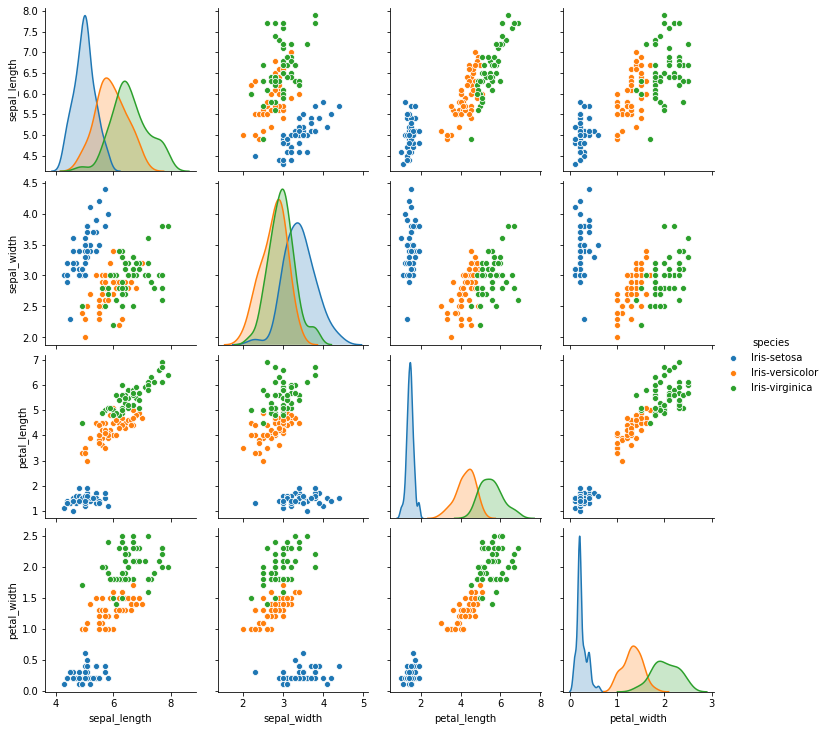

In [40]:
import numpy as np
import pandas as pd
import seaborn
import time
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    
    if probas.shape[1]==1:
      tredshold = torch.zeros_like(probas).add_(0.5)
      probas = torch.cat((probas, tredshold), 1)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
seaborn.pairplot(df, hue="species")
plt.show()

In [ ]:
df.groupby(df['species']).size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
data = df.iloc[0:100, :]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
# split train test

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
y_train = data_train.iloc[:, 4].values
y_train = np.where(y_train == 'Iris-setosa', 0, 1)

X_train = data_train.iloc[:, [0,3]].values

y_test = data_test.iloc[:, 4].values
y_test = np.where(y_test == 'Iris-setosa', 0, 1)

X_test = data_test.iloc[:, [0,3]].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


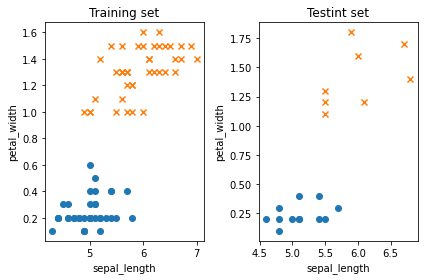

In [ ]:
plt.subplot(121)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='x')
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[3])

plt.subplot(122)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='x')
plt.title('Testint set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[3])
plt.tight_layout()

plt.show()

#### Constructed model

In [ ]:
class LogisticRegression(torch.nn.Module):

  def __init__(self, num_features):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(num_features, 1)
    # self.linear.weight.detach().zero_()
    # self.linear.bias.detach().zero_()

  def forward(self,x):
    logits = self.linear(x)
    probas = torch.sigmoid(logits)
    return logits, probas

def comp_accuracy(label_var, pred_probas):
    pred_labels = custom_where((pred_probas > 0.5).float(), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc

def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((1-cond) * x_2)

#### Train model

In [ ]:
start_time = time.time()

# torch.manual_seed(123)
model = LogisticRegression(num_features=2).to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [ ]:
num_epochs = 50
ACC_train = []
ACC_test = []
COST = []

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=DEVICE).view(-1,1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=DEVICE).view(-1,1)

for epoch in range(num_epochs):
    
  #### Compute outputs ####
  logits, probas = model(X_train_tensor)
  
  #### Compute gradients ####
  cost = F.binary_cross_entropy(probas, y_train_tensor)
  COST.append(cost.data)
  optimizer.zero_grad()
  cost.backward()
  
  #### Update weights ####  
  optimizer.step()
  
  #### Logging ####   
  pred_logits, pred_probas = model(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, pred_probas)
  acc_train = comp_accuracy(y_train_tensor, probas)
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print('Epoch: %03d' % (epoch + 1), end="")
  print(' | Train ACC: %.3f' % acc_train, end="")
  print(' | Test ACC: %.3f' % acc_test, end="")
  print(' | Cost: %.3f' % F.binary_cross_entropy(probas, y_train_tensor))
    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001 | Train ACC: 0.475 | Test ACC: 0.400 | Cost: 0.803
Epoch: 002 | Train ACC: 0.525 | Test ACC: 1.000 | Cost: 0.604
Epoch: 003 | Train ACC: 1.000 | Test ACC: 0.550 | Cost: 0.554
Epoch: 004 | Train ACC: 0.712 | Test ACC: 1.000 | Cost: 0.541
Epoch: 005 | Train ACC: 0.988 | Test ACC: 0.900 | Cost: 0.532
Epoch: 006 | Train ACC: 0.913 | Test ACC: 1.000 | Cost: 0.524
Epoch: 007 | Train ACC: 0.975 | Test ACC: 1.000 | Cost: 0.517
Epoch: 008 | Train ACC: 0.975 | Test ACC: 1.000 | Cost: 0.511
Epoch: 009 | Train ACC: 0.975 | Test ACC: 1.000 | Cost: 0.504
Epoch: 010 | Train ACC: 0.975 | Test ACC: 1.000 | Cost: 0.497
Epoch: 011 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.491
Epoch: 012 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.485
Epoch: 013 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.479
Epoch: 014 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.473
Epoch: 015 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.467
Epoch: 016 | Train ACC: 0.988 | Test ACC: 1.000 | Cost: 0.461
Epoch: 0

#### Evaluating model

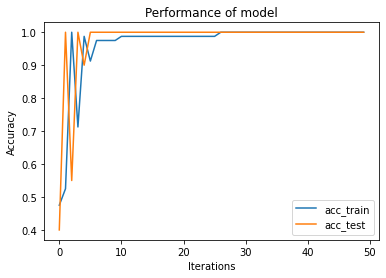

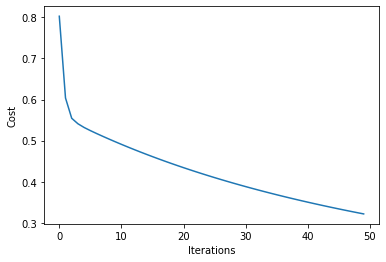

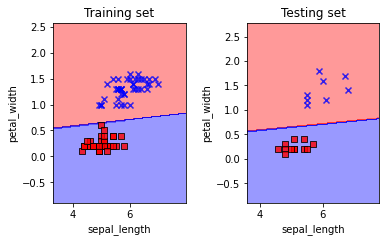

In [ ]:
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[3])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[3])
plt.show()

### Multi-classes classification

#### Problem setting

In [ ]:
data = df.copy()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
np.unique(data['species'].values)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
classes = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}
data.species = [classes[item] for item in data.species]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# split train test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
print(data_train.shape, data_test.shape)

(120, 5) (30, 5)


In [ ]:
y_train = data_train.iloc[:, 4].values

X_train = data_train.iloc[:,[1, 3]].values

y_test = data_test.iloc[:, 4].values

X_test = data_test.iloc[:,[1, 3]].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 2) (120,) (30, 2) (30,)


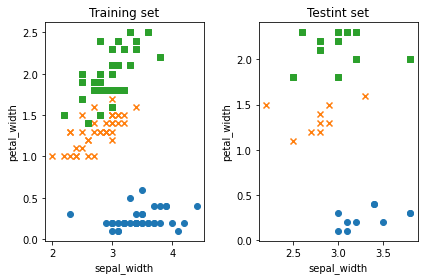

In [ ]:
plt.subplot(121)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='x')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], marker='s')
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[1])
plt.ylabel(list(data_train.head(0))[3])
plt.tight_layout()

plt.subplot(122)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='x')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], marker='s')
plt.title('Testint set')
plt.xlabel(list(data_train.head(0))[1])
plt.ylabel(list(data_train.head(0))[3])
plt.tight_layout()

plt.show()

In [ ]:
# Normalize

mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

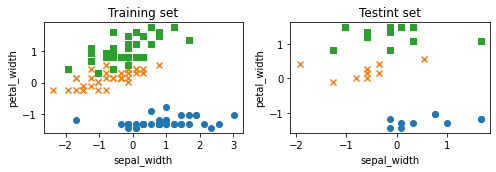

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='x')
ax[0].scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], marker='s')
ax[0].set_title('Training set')
ax[0].set_xlabel(list(data_train.head(0))[1])
ax[0].set_ylabel(list(data_train.head(0))[3])

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='x')
ax[1].scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], marker='s')
ax[1].set_title('Testint set')
ax[1].set_xlabel(list(data_train.head(0))[1])
ax[1].set_ylabel(list(data_train.head(0))[3])
plt.tight_layout()

plt.show()

In [ ]:
# # set y to one-hot
# y_train = np.eye(3)[y_train]
# y_test = np.eye(3)[y_test]
# print(y_train.shape, y_test.shape)

#### Constructed model

In [ ]:
class MultinomialLogisticRegression(torch.nn.Module):

  def __init__(self, num_features, num_classes):
    super(MultinomialLogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(num_features, num_classes)
    # self.linear.weight.detach().zero_()
    # self.linear.bias.detach().zero_()

  def forward(self,x):
    logits = self.linear(x)
    probas = F.softmax(logits, dim=1)
    return logits, probas

def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((1-cond) * x_2)

#### Train model

In [ ]:
start_time = time.time()

torch.manual_seed(123)
model2 = MultinomialLogisticRegression(num_features=2, num_classes=3).to(DEVICE)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.2)

In [ ]:
num_epochs = 50
ACC_train = []
ACC_test = []
COST = []

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=DEVICE)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=DEVICE)

for epoch in range(num_epochs):
    
  #### Compute outputs ####
  logits, probas = model2(X_train_tensor)
  
  #### Compute gradients ####
  cost = F.cross_entropy(logits, y_train_tensor.long())
  COST.append(cost.data)
  optimizer.zero_grad()
  cost.backward()
  
  #### Update weights ####  
  optimizer.step()
  
  #### Logging ####    
  pred_logits, pred_probas = model2(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print('Epoch: %03d' % (epoch + 1), end="")
  print(' | Train ACC: %.3f' % acc_train, end="")
  print(' | Test ACC: %.3f' % acc_test, end="")
  print(' | Cost: %.3f' % F.cross_entropy(logits, y_train_tensor.long()))
    
print('\nModel parameters:')
print('  Weights: %s' % model2.linear.weight)
print('  Bias: %s' % model2.linear.bias)
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001 | Train ACC: 0.650 | Test ACC: 0.700 | Cost: 0.914
Epoch: 002 | Train ACC: 0.658 | Test ACC: 0.700 | Cost: 0.861
Epoch: 003 | Train ACC: 0.658 | Test ACC: 0.700 | Cost: 0.816
Epoch: 004 | Train ACC: 0.658 | Test ACC: 0.700 | Cost: 0.778
Epoch: 005 | Train ACC: 0.650 | Test ACC: 0.700 | Cost: 0.744
Epoch: 006 | Train ACC: 0.708 | Test ACC: 0.733 | Cost: 0.715
Epoch: 007 | Train ACC: 0.725 | Test ACC: 0.800 | Cost: 0.690
Epoch: 008 | Train ACC: 0.742 | Test ACC: 0.800 | Cost: 0.668
Epoch: 009 | Train ACC: 0.775 | Test ACC: 0.800 | Cost: 0.648
Epoch: 010 | Train ACC: 0.783 | Test ACC: 0.867 | Cost: 0.630
Epoch: 011 | Train ACC: 0.783 | Test ACC: 0.900 | Cost: 0.614
Epoch: 012 | Train ACC: 0.825 | Test ACC: 0.900 | Cost: 0.599
Epoch: 013 | Train ACC: 0.833 | Test ACC: 0.933 | Cost: 0.586
Epoch: 014 | Train ACC: 0.833 | Test ACC: 0.933 | Cost: 0.574
Epoch: 015 | Train ACC: 0.842 | Test ACC: 0.933 | Cost: 0.563
Epoch: 016 | Train ACC: 0.842 | Test ACC: 0.933 | Cost: 0.552
Epoch: 0

#### Evaluating model

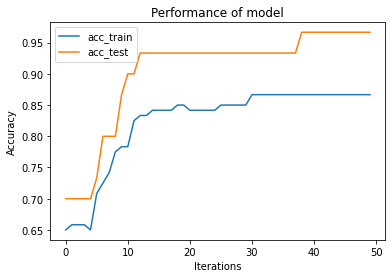

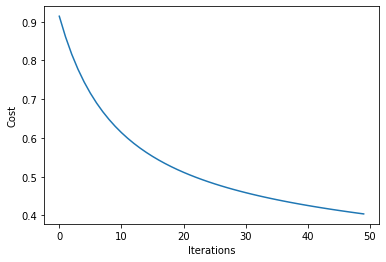

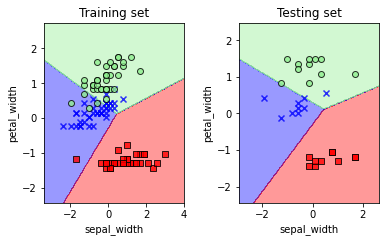

In [ ]:
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model2.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[1])
plt.ylabel(list(data_train.head(0))[3])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model2.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[1])
plt.ylabel(list(data_test.head(0))[3])
plt.show()

### Multi-Layer Perceptron

#### Problem setting

In [41]:
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Python_for_Deep_Learning/dataset/xor.csv', header=0)
df

,x1,x2,class label
0,0.781306,1.062984,0
1,-1.060524,-1.095550,0
2,0.632125,0.674028,0
3,-1.424712,0.535203,1
4,1.383161,1.368510,0
...,...,...,...
745,0.792484,0.839275,0
746,0.582466,-0.749250,1
747,-1.593475,0.671721,1
748,-0.812671,-0.268542,0


In [42]:
# split train test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
print(data_train.shape, data_test.shape)

(525, 3) (225, 3)


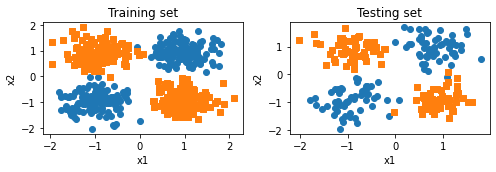

In [43]:
X_train = data_train[['x1', 'x2']].values
y_train = data_train['class label'].values

X_test = data_test[['x1', 'x2']].values
y_test = data_test['class label'].values

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='s')
ax[0].set_title('Training set')
ax[0].set_xlabel(list(data_train.head(0))[0])
ax[0].set_ylabel(list(data_train.head(0))[1])

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='s')
ax[1].set_title('Testing set')
ax[1].set_xlabel(list(data_test.head(0))[0])
ax[1].set_ylabel(list(data_test.head(0))[1])

plt.tight_layout()
plt.show()

#### Constructed model

In [44]:
class MLPLinear(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_classes):
        super(MLPLinear, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_out = torch.nn.Linear(num_hidden_2, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        out = self.linear_2(out)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

def cost_(logits, targets):
  return F.cross_entropy(logits, targets)

def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

In [45]:
torch.manual_seed(123)

model3 = MLPLinear(num_features=2,
                   num_hidden_1=15,
                   num_hidden_2=20,
                   num_classes=2)

model3 = model3.to(DEVICE)

#### Train model

In [46]:
start_time = time.time()

optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(DEVICE)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

print(X_train_tensor.size(), y_train_tensor.size(), X_test_tensor.size(), y_test_tensor.size())

torch.Size([525, 2]) torch.Size([525]) torch.Size([225, 2]) torch.Size([225])


In [48]:
# from tqdm import tqdm
num_epochs = 500
COST = []
ACC_train = []
ACC_test = []

for epoch in range(num_epochs):

  ### FORWARD AND BACK PROP
  logits, probas = model3(X_train_tensor)

  cost = cost_(logits, y_train_tensor)
  optimizer.zero_grad()

  cost.backward()
  COST.append(cost)

  ### UPDATE MODEL PARAMETERS
  optimizer.step()

  ### LOGGING
  pred_logits, pred_probas = model3(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print(f'Epoch: {(epoch+1):03d}/{num_epochs:03d} | Train ACC: {acc_train:.3f} | Test ACC: {acc_test:.3f} | Cost: {cost:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
ACC_deep = list(np.abs(np.array(ACC_train)-np.array(ACC_test)))

Epoch: 001/005 | Train ACC: 0.966 | Test ACC: 0.956 | Cost: 0.6405
Epoch: 002/005 | Train ACC: 0.966 | Test ACC: 0.951 | Cost: 0.6352
Epoch: 003/005 | Train ACC: 0.966 | Test ACC: 0.951 | Cost: 0.6298
Epoch: 004/005 | Train ACC: 0.962 | Test ACC: 0.942 | Cost: 0.6242
Epoch: 005/005 | Train ACC: 0.964 | Test ACC: 0.942 | Cost: 0.6186
Total Training Time: 1.32 min


#### Evaluating model

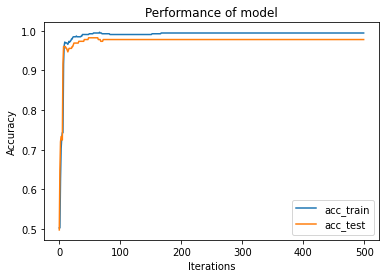

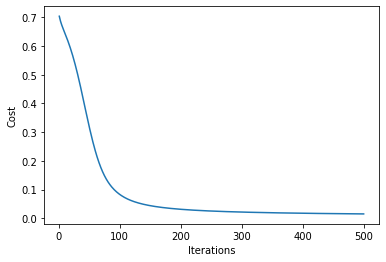

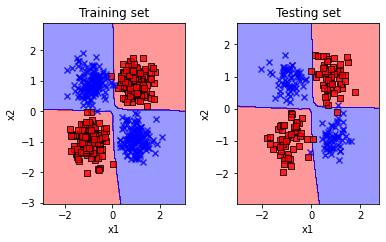

In [ ]:
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(1, len(COST)+1), COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model3.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[1])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model3.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[1])
plt.show()

### Single Hidden Layer Neural Networks

Epoch: 001/500 | Train ACC: 0.442 | Test ACC: 0.480 | Cost: 0.7239
Epoch: 002/500 | Train ACC: 0.486 | Test ACC: 0.502 | Cost: 0.7085
Epoch: 003/500 | Train ACC: 0.509 | Test ACC: 0.542 | Cost: 0.6937
Epoch: 004/500 | Train ACC: 0.537 | Test ACC: 0.547 | Cost: 0.6796
Epoch: 005/500 | Train ACC: 0.571 | Test ACC: 0.582 | Cost: 0.6661
Epoch: 006/500 | Train ACC: 0.613 | Test ACC: 0.604 | Cost: 0.6530
Epoch: 007/500 | Train ACC: 0.648 | Test ACC: 0.658 | Cost: 0.6403
Epoch: 008/500 | Train ACC: 0.691 | Test ACC: 0.707 | Cost: 0.6280
Epoch: 009/500 | Train ACC: 0.731 | Test ACC: 0.747 | Cost: 0.6160
Epoch: 010/500 | Train ACC: 0.783 | Test ACC: 0.796 | Cost: 0.6043
Epoch: 011/500 | Train ACC: 0.815 | Test ACC: 0.813 | Cost: 0.5929
Epoch: 012/500 | Train ACC: 0.840 | Test ACC: 0.840 | Cost: 0.5817
Epoch: 013/500 | Train ACC: 0.859 | Test ACC: 0.844 | Cost: 0.5707
Epoch: 014/500 | Train ACC: 0.882 | Test ACC: 0.853 | Cost: 0.5599
Epoch: 015/500 | Train ACC: 0.905 | Test ACC: 0.898 | Cost: 0.

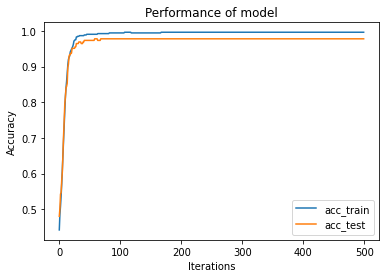

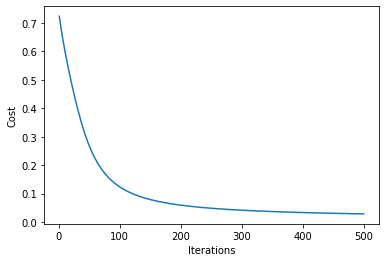

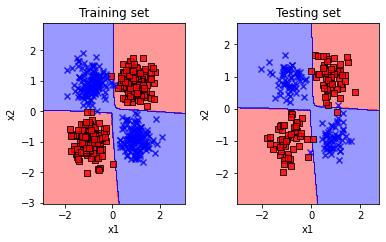

In [ ]:
class SHLNNs(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super(SHLNNs, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

def cost_(logits, targets):
  return F.cross_entropy(logits, targets)

# Constructed model
torch.manual_seed(123)

model4 = SHLNNs(num_features=2,
                   num_hidden_1=35,
                   num_classes=2)

model4 = model4.to(DEVICE)

start_time = time.time()

optimizer = torch.optim.SGD(model4.parameters(), lr=0.1)

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(DEVICE)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

# Train model
num_epochs = 500
COST = []
ACC_train = []
ACC_test = []

for epoch in range(num_epochs):

  ### FORWARD AND BACK PROP
  logits, probas = model4(X_train_tensor)

  cost = cost_(logits, y_train_tensor)
  optimizer.zero_grad()

  cost.backward()
  COST.append(cost)

  ### UPDATE MODEL PARAMETERS
  optimizer.step()

  ### LOGGING
  pred_logits, pred_probas = model4(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print(f'Epoch: {(epoch+1):03d}/{num_epochs:03d} | Train ACC: {acc_train:.3f} | Test ACC: {acc_test:.3f} | Cost: {cost:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
ACC_white = list(np.abs(np.array(ACC_train)-np.array(ACC_test)))

# Evaluating model
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(1, len(COST)+1), COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model4.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[1])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model4.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[1])
plt.show()

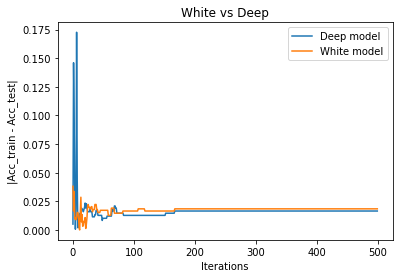

In [ ]:
plt.plot(ACC_deep, label='Deep model')
plt.plot(ACC_white, label='White model')
plt.legend()
plt.title('White vs Deep')
plt.xlabel('Iterations')
plt.ylabel('|Acc_train - Acc_test|')
plt.show()

# Regularization

In [ ]:
import numpy as np
import pandas as pd
import seaborn
import time
import torch
import torch.nn.functional as F
from matplotlib.colors import ListedColormap

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    
    if probas.shape[1]==1:
      tredshold = torch.zeros_like(probas).add_(0.5)
      probas = torch.cat((probas, tredshold), 1)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

## $L_2$-regularization

Ridge regression : $\frac{1}{n}\sum_{i=1}^n\mathcal{L}(y^{[i]},o^{[i]})+\frac{\lambda}{2}||w||_2^2$

### Manually

#### Problem setting

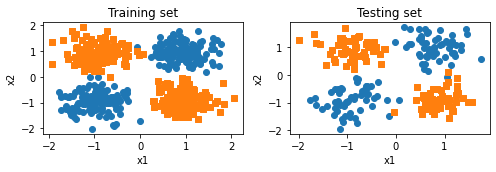

In [ ]:
# Problem setting

import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/python_IRN/Python_for_Deep_Learning/dataset/xor.csv', header=0)

# split train test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

X_train = data_train[['x1', 'x2']].values
y_train = data_train['class label'].values

X_test = data_test[['x1', 'x2']].values
y_test = data_test['class label'].values

# Normalize
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='s')
ax[0].set_title('Training set')
ax[0].set_xlabel(list(data_train.head(0))[0])
ax[0].set_ylabel(list(data_train.head(0))[1])

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='s')
ax[1].set_title('Testing set')
ax[1].set_xlabel(list(data_test.head(0))[0])
ax[1].set_ylabel(list(data_test.head(0))[1])

plt.tight_layout()
plt.show()

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(DEVICE)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

#### Constructed model

In [ ]:
# Constructed model

class MLPLinear(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_classes):
        super(MLPLinear, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_out = torch.nn.Linear(num_hidden_2, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        out = self.linear_2(out)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

def cost_(logits, targets, model, LAMBDA=1e-6):
  cost = F.cross_entropy(logits, targets)
  cost += 0.5 * LAMBDA * torch.norm(model.linear_out.weight, p=None)**2
  cost += 0.5 * LAMBDA * torch.norm(model.linear_out.bias, p=None)**2
  return cost

def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

#### Train model

In [ ]:
# Model setting

torch.manual_seed(123)
num_epochs = 500
LAMBDA = 1e-6

model = MLPLinear(num_features=2,
                   num_hidden_1=15,
                   num_hidden_2=20,
                   num_classes=2)

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Train model

start_time = time.time()

COST = []
ACC_train = []
ACC_test = []

for epoch in range(num_epochs):

  ### FORWARD AND BACK PROP
  logits, probas = model(X_train_tensor)

  cost = cost_(logits, y_train_tensor, model, LAMBDA)
  optimizer.zero_grad()

  cost.backward()
  COST.append(cost)

  ### UPDATE MODEL PARAMETERS
  optimizer.step()

  ### LOGGING
  pred_logits, pred_probas = model(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print(f'Epoch: {(epoch+1):03d}/{num_epochs:03d} | Train ACC: {acc_train:.3f} | Test ACC: {acc_test:.3f} | Cost: {cost:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/500 | Train ACC: 0.503 | Test ACC: 0.498 | Cost: 0.7028
Epoch: 002/500 | Train ACC: 0.503 | Test ACC: 0.649 | Cost: 0.6936
Epoch: 003/500 | Train ACC: 0.636 | Test ACC: 0.720 | Cost: 0.6858
Epoch: 004/500 | Train ACC: 0.703 | Test ACC: 0.733 | Cost: 0.6790
Epoch: 005/500 | Train ACC: 0.731 | Test ACC: 0.738 | Cost: 0.6728
Epoch: 006/500 | Train ACC: 0.745 | Test ACC: 0.729 | Cost: 0.6671
Epoch: 007/500 | Train ACC: 0.743 | Test ACC: 0.911 | Cost: 0.6616
Epoch: 008/500 | Train ACC: 0.909 | Test ACC: 0.956 | Cost: 0.6562
Epoch: 009/500 | Train ACC: 0.962 | Test ACC: 0.960 | Cost: 0.6510
Epoch: 010/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6458
Epoch: 011/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6406
Epoch: 012/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6353
Epoch: 013/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6299
Epoch: 014/500 | Train ACC: 0.970 | Test ACC: 0.956 | Cost: 0.6244
Epoch: 015/500 | Train ACC: 0.968 | Test ACC: 0.947 | Cost: 0.

#### Evaluating model

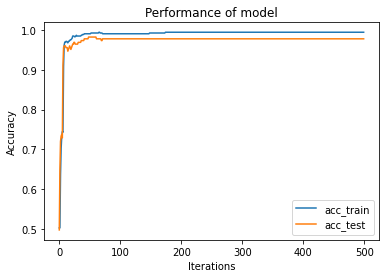

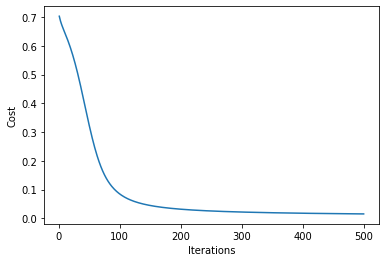

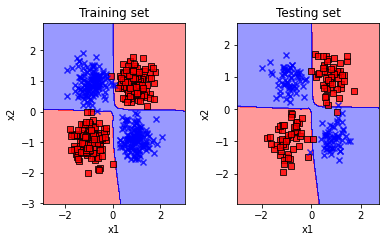

In [ ]:
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(1, len(COST)+1), COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[1])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[1])
plt.show()

### Automatically via ``weight_decay``

In [ ]:
# Model setting

torch.manual_seed(123)
num_epochs = 500
LAMBDA = 1e-6

model2 = MLPLinear(num_features=2,
                   num_hidden_1=15,
                   num_hidden_2=20,
                   num_classes=2)

model2 = model2.to(DEVICE)

optimizer = torch.optim.SGD(model2.parameters(), lr=0.1, weight_decay=LAMBDA)

In [ ]:
# Train model

start_time = time.time()

COST = []
ACC_train = []
ACC_test = []

for epoch in range(num_epochs):

  ### FORWARD AND BACK PROP
  logits, probas = model2(X_train_tensor)

  cost = F.cross_entropy(logits, y_train_tensor)
  optimizer.zero_grad()

  cost.backward()
  COST.append(cost)

  ### UPDATE MODEL PARAMETERS
  optimizer.step()

  ### LOGGING
  pred_logits, pred_probas = model2(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print(f'Epoch: {(epoch+1):03d}/{num_epochs:03d} | Train ACC: {acc_train:.3f} | Test ACC: {acc_test:.3f} | Cost: {cost:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
ACC_l2 = list(np.abs(np.array(ACC_train)-np.array(ACC_test)))

Epoch: 001/500 | Train ACC: 0.503 | Test ACC: 0.498 | Cost: 0.7028
Epoch: 002/500 | Train ACC: 0.503 | Test ACC: 0.649 | Cost: 0.6936
Epoch: 003/500 | Train ACC: 0.636 | Test ACC: 0.720 | Cost: 0.6858
Epoch: 004/500 | Train ACC: 0.703 | Test ACC: 0.733 | Cost: 0.6790
Epoch: 005/500 | Train ACC: 0.731 | Test ACC: 0.738 | Cost: 0.6728
Epoch: 006/500 | Train ACC: 0.745 | Test ACC: 0.729 | Cost: 0.6671
Epoch: 007/500 | Train ACC: 0.743 | Test ACC: 0.911 | Cost: 0.6616
Epoch: 008/500 | Train ACC: 0.909 | Test ACC: 0.956 | Cost: 0.6562
Epoch: 009/500 | Train ACC: 0.962 | Test ACC: 0.960 | Cost: 0.6510
Epoch: 010/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6458
Epoch: 011/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6406
Epoch: 012/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6353
Epoch: 013/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6299
Epoch: 014/500 | Train ACC: 0.970 | Test ACC: 0.956 | Cost: 0.6244
Epoch: 015/500 | Train ACC: 0.968 | Test ACC: 0.947 | Cost: 0.

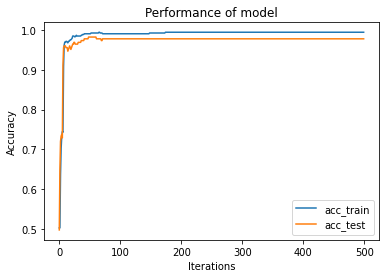

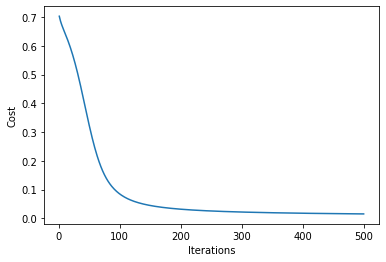

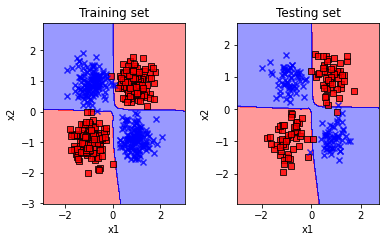

In [ ]:
# Evaluating model

plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(1, len(COST)+1), COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model2.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[1])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model2.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[1])
plt.show()

## $L_1$-regularization

LASSO : $\frac{1}{n}\sum_{i=1}^n\mathcal{L}(y^{[i]},o^{[i]})+\lambda||w||_1$

In [ ]:
!pip install "limpapat==0.0.2"

In [ ]:
from limpapat import FBA

### Problem setting

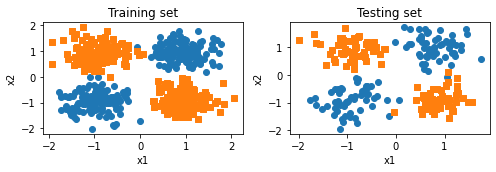

In [ ]:
# Problem setting

import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/python_IRN/Python_for_Deep_Learning/dataset/xor.csv', header=0)

# split train test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

X_train = data_train[['x1', 'x2']].values
y_train = data_train['class label'].values

X_test = data_test[['x1', 'x2']].values
y_test = data_test['class label'].values

# Normalize
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='s')
ax[0].set_title('Training set')
ax[0].set_xlabel(list(data_train.head(0))[0])
ax[0].set_ylabel(list(data_train.head(0))[1])

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], marker='s')
ax[1].set_title('Testing set')
ax[1].set_xlabel(list(data_test.head(0))[0])
ax[1].set_ylabel(list(data_test.head(0))[1])

plt.tight_layout()
plt.show()

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(DEVICE)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(DEVICE)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

### Constructed model

In [ ]:
# Constructed model

class MLPLinear(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_classes):
        super(MLPLinear, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_out = torch.nn.Linear(num_hidden_2, num_classes)
        
    def forward(self, x):
        
        out = self.linear_1(x)
        out = F.relu(out)
        out = self.linear_2(out)
        out = F.relu(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

def cost_(logits, targets, model, LAMBDA=1e-6):
  cost = F.cross_entropy(logits, targets)
  cost += LAMBDA * torch.norm(model.linear_out.weight, p=1)
  cost += LAMBDA * torch.norm(model.linear_out.bias, p=1)
  return cost

def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

### Train model

In [ ]:
# Model setting

torch.manual_seed(123)
num_epochs = 500
LAMBDA = 1e-6

model = MLPLinear(num_features=2,
                   num_hidden_1=15,
                   num_hidden_2=20,
                   num_classes=2)

model = model.to(DEVICE)

optimizer = FBA(model.parameters(), lr=0.1)

In [ ]:
# Train model

start_time = time.time()

COST = []
ACC_train = []
ACC_test = []

for epoch in range(num_epochs):

  ### FORWARD AND BACK PROP
  logits, probas = model(X_train_tensor)

  cost = cost_(logits, y_train_tensor, model, LAMBDA)
  optimizer.zero_grad()

  cost.backward()
  COST.append(cost)

  ### UPDATE MODEL PARAMETERS
  optimizer.step()

  ### LOGGING
  pred_logits, pred_probas = model(X_test_tensor)
  acc_test = comp_accuracy(y_test_tensor, torch.argmax(pred_probas, dim=1))
  acc_train = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
  ACC_test.append(acc_test)
  ACC_train.append(acc_train)
  print(f'Epoch: {(epoch+1):03d}/{num_epochs:03d} | Train ACC: {acc_train:.3f} | Test ACC: {acc_test:.3f} | Cost: {cost:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
ACC_l1 = list(np.abs(np.array(ACC_train)-np.array(ACC_test)))

Epoch: 001/500 | Train ACC: 0.503 | Test ACC: 0.498 | Cost: 0.7028
Epoch: 002/500 | Train ACC: 0.503 | Test ACC: 0.649 | Cost: 0.6936
Epoch: 003/500 | Train ACC: 0.638 | Test ACC: 0.720 | Cost: 0.6858
Epoch: 004/500 | Train ACC: 0.703 | Test ACC: 0.733 | Cost: 0.6790
Epoch: 005/500 | Train ACC: 0.731 | Test ACC: 0.738 | Cost: 0.6728
Epoch: 006/500 | Train ACC: 0.745 | Test ACC: 0.729 | Cost: 0.6671
Epoch: 007/500 | Train ACC: 0.743 | Test ACC: 0.911 | Cost: 0.6616
Epoch: 008/500 | Train ACC: 0.909 | Test ACC: 0.956 | Cost: 0.6563
Epoch: 009/500 | Train ACC: 0.962 | Test ACC: 0.960 | Cost: 0.6511
Epoch: 010/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6459
Epoch: 011/500 | Train ACC: 0.970 | Test ACC: 0.960 | Cost: 0.6407
Epoch: 012/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6354
Epoch: 013/500 | Train ACC: 0.971 | Test ACC: 0.956 | Cost: 0.6300
Epoch: 014/500 | Train ACC: 0.970 | Test ACC: 0.956 | Cost: 0.6245
Epoch: 015/500 | Train ACC: 0.968 | Test ACC: 0.947 | Cost: 0.

### Evaluating model

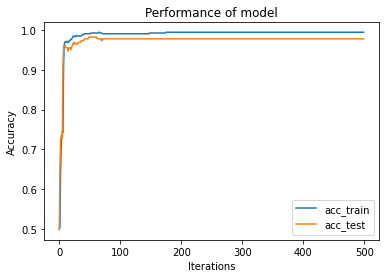

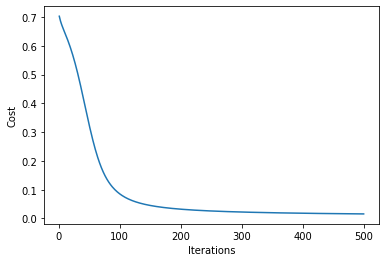

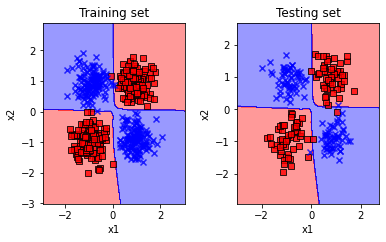

In [ ]:
plt.plot(ACC_train, label='acc_train')
plt.plot(ACC_test, label='acc_test')
plt.legend()
plt.title('Performance of model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(1, len(COST)+1), COST)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.subplot(121)
plot_decision_regions(X_train_tensor.to(torch.device('cpu')), y_train_tensor.view(y_train_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Training set')
plt.xlabel(list(data_train.head(0))[0])
plt.ylabel(list(data_train.head(0))[1])

plt.subplot(122)
plot_decision_regions(X_test_tensor.to(torch.device('cpu')), y_test_tensor.view(y_test_tensor.shape[0]).to(torch.device('cpu')), classifier=model.to(torch.device('cpu')))
plt.tight_layout(pad=3.0)
plt.title('Testing set')
plt.xlabel(list(data_test.head(0))[0])
plt.ylabel(list(data_test.head(0))[1])
plt.show()

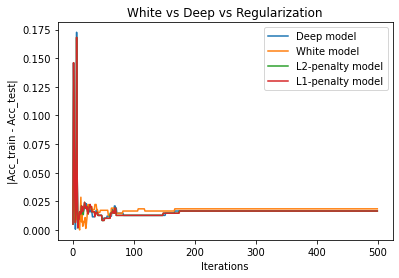

In [ ]:
plt.plot(ACC_deep, label='Deep model')
plt.plot(ACC_white, label='White model')
plt.plot(ACC_l2, label='L2-penalty model')
plt.plot(ACC_l1, label='L1-penalty model')
plt.legend()
plt.title('White vs Deep vs Regularization')
plt.xlabel('Iterations')
plt.ylabel('|Acc_train - Acc_test|')
plt.show()

In [ ]:
# Tip : interactive graph via plotly

import plotly.graph_objects as go

trace1 = go.Scatter(
    x=[i for i in range(500)],
    y=ACC_deep,
    name='ACC_deep'
)
trace2 = go.Scatter(
    x=[i for i in range(500)],
    y=ACC_white,
    name='ACC_white'
)
trace3 = go.Scatter(
    x=[i for i in range(500)],
    y=ACC_l1,
    name='ACC_l1'
)
trace4 = go.Scatter(
    x=[i for i in range(500)],
    y=ACC_l2,
    name='ACC_l2'
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    legend=dict(
        traceorder="reversed"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()